<a href="https://colab.research.google.com/github/subana-2k4/number-plates-detection/blob/main/number_plates_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

Detected Plate Text: ERZ 1B5Z
Detected Plate Text: ERZ 5889


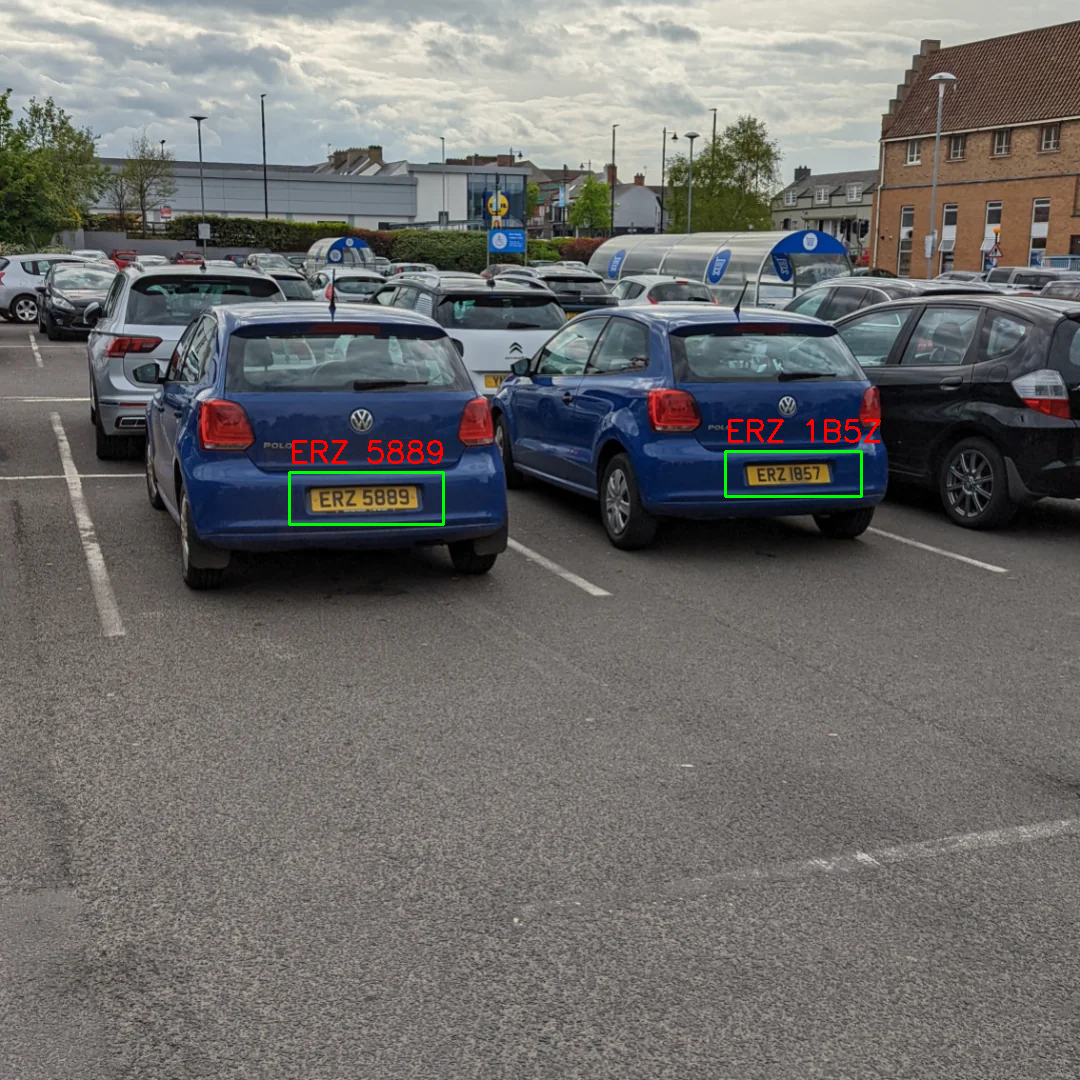

In [ ]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow # Import cv2_imshow


# Load the image
image_path = 'np1.webp'  # Replace with your image
image = cv2.imread(image_path)

# Load Haar cascade for number plate detection
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect plates
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

# Initialize OCR reader
reader = easyocr.Reader(['en'])

# Loop through detected plates
for (x, y, w, h) in plates:
    plate_img = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # OCR
    result = reader.readtext(plate_img)
    for detection in result:
        text = detection[1]
        print("Detected Plate Text:", text)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Show result
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0) # Remove this line as it is not needed in Colab
# cv2.destroyAllWindows() # Remove this line as it is not needed in Colab